 # Crime Rate

Crime rate will be treated as a positive metric in our point system. The idea is that with more crime, there will be more people around an individual that will be criminals, which will make getting away with crime and learning how to commit crime easier for said individual.

The dataset used listed multiple different crimes and the occurance in each of the neighborhoods. While assult and larceny are both crimes, one is clearly much worse than the other. In order to get a better idea about which neighborhoods had the worst crimes commited, a formula was applied to weight murder, assult, and rape significantly more than robbery, burglary, and larceny. The formula is as follows:

Weighted Crime Rate = ( (Number of Murders * 10) + (Number of Assults * 10) + (Number of Rapes * 10) + Number of Robberies + Number of Burglarys + Number of Larceny ) / Population

This gives a new statistic, weighted crime rate, which is on a per capita basis. The higher the weighted crime rate, the overall better the community is in our study.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt 

#Imports the data about crime rates
crimeRate = pd.read_csv("CrimeRateFile.csv",sep=",")


#Stores data on neighborhoods and populations
neighborhoods = crimeRate["neighborhood"].tolist()
population = crimeRate["population"].tolist()


#Stores data about crimes and their 
murder = crimeRate["number_arrests_murder"].tolist()
assult = crimeRate["number_arrests_assault"].tolist()
rapes = crimeRate["number_arrests_rape"].tolist()
robberys = crimeRate["number_arrests_robbery"].tolist()
burglarys = crimeRate["number_arrests_burglary"].tolist()
larceny = crimeRate["number_arrests_larceny"].tolist()


#Creates a dictionary to store data
neighRate = {}


#Implementing the formula
for Ne, Mu, As, Ra, Ro, Bu, La, Po in zip(neighborhoods, murder, assult, rapes, robberys, burglarys, larceny, population):
    neighRate.update({Ne : ( (10*Mu) + (10*As) + (10*Ra) + Ro + Bu + La ) / Po})
    
print(neighRate)

{'31st Ward': 0.07466420858572557, 'Allegheny Center': 1.010204081632653, 'Allegheny West': 0.30629853321829165, 'Allentown': 0.1063070210234034, 'Arlington': 0.08743169398907104, 'Arlington Heights': 0.3469079939668175, 'Banksville': 0.03384121892542101, 'Bedford Dwellings': 0.10068775790921596, 'Beechview': 0.050983416891631314, 'Beltzhoover': 0.15702341137123746, 'Bloomfield': 0.09571732902372732, 'Bon Air': 0.0861344537815126, 'Brighton Heights': 0.05200188412623646, 'Brookline': 0.049572039942938656, 'California Ave.': 0.15040953090096798, 'Carrick': 0.06287521786843973, 'Central North Side': 0.3360010162601626, 'Crafton Heights - Westwood - Oakwood': 0.03551234996528122, 'East Carnegie': 0.04536290322580645, 'East Hills': 0.09277767301527437, 'East Liberty': 0.3593981253083374, 'East North Side': 0.21751920248406603, 'Elliot': 0.06962663975782038, 'Esplen': 0.15160642570281124, 'Friendship': 0.14232209737827714, 'Garfield': 0.12135837135837135, 'Greenfield': 0.05333893322133557, 

In [5]:
#Stores values in lists
neighWeight = list(neighRate.values())
weightedRate = list(neighRate.keys())

#Creating the data frame
df = pd.DataFrame(list(zip(neighRate, neighWeight)), columns=["Neighborhoods", "Weighted Crime Rate"])
df["Points"] = df["Weighted Crime Rate"]*100
df["Neighborhoods"] = df["Neighborhoods"].str.lower()
sortDF = df.sort_values(by=['Weighted Crime Rate'],ascending=False)

#Gets rid of invalid values
sortDF = sortDF.dropna()

sortDF.head()

,Neighborhoods,Weighted Crime Rate,Points
1,allegheny center,1.010204,101.020408
62,the strip,0.875147,87.514723
20,east liberty,0.359398,35.939813
69,west end valley,0.352239,35.223881
5,arlington heights,0.346908,34.690799


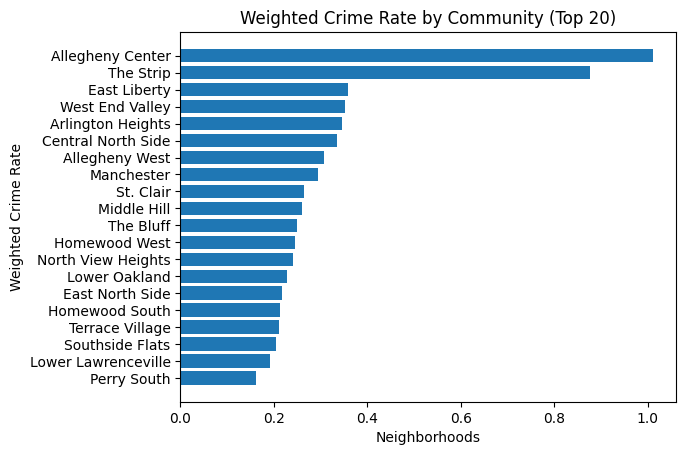

In [6]:
# Takes all of the values of the dictionary containing neighborhoods and weighted crime rate and sorts it in ascending order
sortedValues = dict(sorted(neighRate.items(), key=lambda item: item[1]))

# Takes the highest 20 weighted crime rates and their respective communities and stores them
topCom = (list(sortedValues.values())[50:])
topRate = (list(sortedValues.keys())[50:])

# Creates a bar graph with weighted crime rate on the x-axis and community of the y-axis
plt.barh(topRate, topCom)
plt.xlabel("Neighborhoods")
plt.ylabel("Weighted Crime Rate")
plt.title("Weighted Crime Rate by Community (Top 20)")
plt.show()

# Conclusion - Crime Rate

Allegheny Center has the highest weighted crime rate with a staggering weighted crime rate of 1.01, meaning there is over 1 crime commited per individual in the community. The point data (which is positively correlated to crime rate) will be added to the final tally to create the list of best places to commit capital crime.